In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

import sys
sys.path.insert(1, '../src/')

from SEIR_exams import *
from SEIR import *

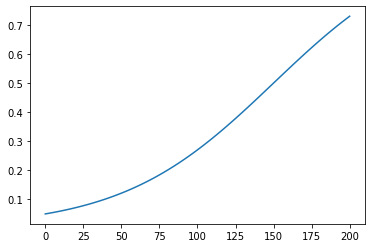

In [11]:
k = 0.02
alpha0 = 150
x = np.linspace (0, 200, 100)
y = sigmoid(x, alpha0, k, b = 0)

plt.plot(x, y)

In [3]:

#We define alpha as: 
I_alpha =i_data/i_c
#where i_data the real data and i_c is the infected evaluated by the SEIR model with respect to time (Days)
#Now we fit I_alpha as a sigmoid function



popt, pcov = curve_fit(sigmoid, x_times, I_alpha, p0, method='dogbox')
#x_times son los datos reales, las fechas
x = np.linspace(0, 30, 19)
alpha = sigmoid(x, *popt)

I = i_c/alpha
print(p0)
print("popt",popt )
plt.plot(x_times,i_data , 'o', label='data')
#alpha no se nota si se plotea con los otros plot, pero si se plotea sola se nota que es un sigmoide
#plt.plot(x,alpha,'-', label='Alpha')
plt.plot(x_times, i_c, label='SEIR')
plt.plot(x_times, I, label='Real')
plt.legend()
plt.show()

NameError: name 'i_data' is not defined

In [12]:
beta = 1e-07
sigma = 1/14.5 
gamma = 1./12.0

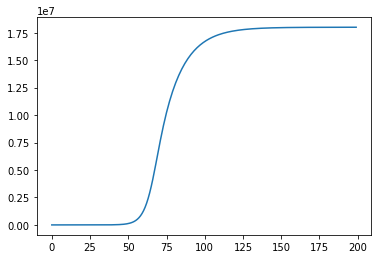

In [46]:
pop = 1.8e7
i0 = 1
e0 = 0
r0 = 0
s0 = pop - i0 - r0 - e0

ts = np.arange (0, 200, 1)
s_c, e_c, i_c, r_c = SEIR_forward(ts, s0, e0, i0, r0, beta, sigma, gamma)

plt.plot (ts, i_c+r_c)


In [146]:
alpha0 = 10000
k = 9e-4
Ex = 5000.
dI = i_c[1:] - i_c[:-1] + r_c[1:] - r_c[:-1]
alpha = (1./(1+np.exp(-(dI-alpha0)*k)))
dIe = Ex*alpha




In [ ]:
dIs = np.arange(0, 1e4, 10)
alphas = (1./(1+np.exp(-(dIs-alpha0)*k)))
plt.plot(dIs, alphas)

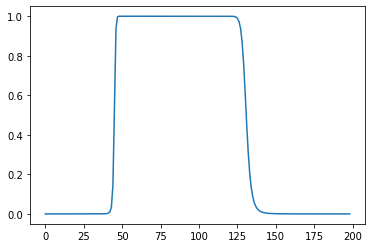

In [149]:
plt.plot(alpha)

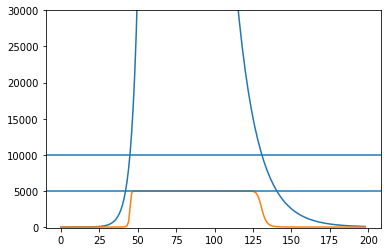

In [152]:
plt.plot(dI)
plt.plot(dIe)
#plt.yscale("log")
#plt.ylim((-100, Ex + 1000000))
plt.ylim((-100, 30000))
plt.axhline(alpha0)
plt.axhline(alpha0/2)


In [14]:
S_c, E_c, I_c, R_c, I_m = SEIR_exams (ts, s0, e0, i0, r0, beta, sigma, gamma, alpha0, k)


(0, 500)

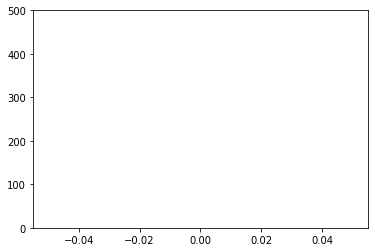

In [17]:
#plt.plot(I_c)
plt.plot(I_m, ls = "--")
plt.ylim ((0, 500))